<a href="https://colab.research.google.com/github/Pavi99sandamini151/Machine_learning/blob/main/multivariare_regression_with_gradient_decent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#importing the dataset from UCI
theDataset = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv'

df = pd.read_csv(theDataset,header=None)

#filtering unwanted columns
df.drop(columns=[0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20], inplace=True, axis=1)

#Removing the header row
df = df.iloc[1:] 
df = df.astype(float) #Converting all values in the dataset to float

#Adding the bias column to the dataset
df = pd.concat([pd.Series(1, index=df.index, name="00"), df], axis=1)
#Printing the dataframe after pre-processing
df.head()

,00,2,21,22,23,24,25,26,27,28
1,1,30.0,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
2,1,30.0,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
3,1,30.0,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
4,1,40.0,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
5,1,40.0,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [3]:
#Independent variables -> X 
X = df.drop(columns=[21,22,23,24,25,26,27,28], axis=1)
#Dependent variable -> y
y = df.iloc[:, 1]
y

1        30.0
2        30.0
3        30.0
4        40.0
5        40.0
         ... 
19731     0.0
19732     0.0
19733    10.0
19734    10.0
19735    10.0
Name: 2, Length: 19735, dtype: float64

In [4]:
print(X)

       00     2
1       1  30.0
2       1  30.0
3       1  30.0
4       1  40.0
5       1  40.0
...    ..   ...
19731   1   0.0
19732   1   0.0
19733   1  10.0
19734   1  10.0
19735   1  10.0

[19735 rows x 2 columns]


In [5]:
#Normalizing of features
for i in X.columns:
  maxValue = max(X[i])
  X[i] /= maxValue
  

In [6]:
#splitting data into two sets as traindata and testdata 
from sklearn.model_selection import train_test_split

#40% of the whole dataset is taken as the test data and the other 60% as the train data randomly
X_traindata, X_testdata, y_traindata, y_testdata = train_test_split(X, y, test_size = 0.4, random_state = 69) 

In [7]:
#Initialized theta variables to random values
theta = np.random.randint(100, size=(len(X.columns)))

In [8]:
def costFunction(X, y, theta, N):

    #hypothesis
    hx = theta*X  
    hx = np.sum(hx, axis=1)
    finalCost = np.sum((hx-y)**2)/(2*N)
    return finalCost

In [9]:
def gradientDescent(X, y, theta, learningRate, iterationsAmount,N):

    #An array to record the cost at each itertion of the algorithm
    stepwiseCosts = [] 
    while (iterationsAmount>0): 

        #hypothesis   
        hx = theta*X  
        hx = np.sum(hx, axis=1) 
        
        #Updating all the theta values
        for j in range(0, len(X.columns)):
            theta[j] = theta[j] - (learningRate/N)*(sum((hx-y)*X.iloc[:,j]))

        #recording cost at each itertion to the above array
        stepwiseCosts.append(costFunction(X, y, theta,N)) 
        iterationsAmount-=1

    return stepwiseCosts, theta

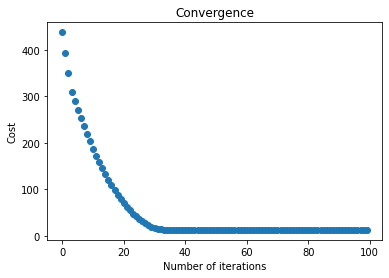

In [10]:
#Model configurations
learningRate = 0.05
iterationsAmount = 100
#Number of datapoints
N = float(len(df)) 

#Training the multivariate linear regression model
stepwiseCosts, theta = gradientDescent(X_traindata, y_traindata, theta, learningRate, iterationsAmount,N)

#Plotting convergence
plt.figure()
plt.xlabel('Number of iterations')
plt.ylabel('Cost')
plt.title('Convergence')
plt.scatter(x=list(range(0, iterationsAmount)), y=stepwiseCosts)
plt.show()

In [11]:
#Testing the accuracy of model

#hypothesis 
predicted_Y_values = theta*X_testdata 
predicted_Y_values = np.sum(predicted_Y_values, axis=1) 

from sklearn.metrics import r2_score
print('The r2 score is: ',r2_score(y_testdata,predicted_Y_values))

The r2 score is:  0.3131463206568319
